In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\Hitters.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [4]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [5]:
y = df.Salary

In [6]:
# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

In [7]:
# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 19 columns):
AtBat          322 non-null float64
Hits           322 non-null float64
HmRun          322 non-null float64
Runs           322 non-null float64
RBI            322 non-null float64
Walks          322 non-null float64
Years          322 non-null float64
CAtBat         322 non-null float64
CHits          322 non-null float64
CHmRun         322 non-null float64
CRuns          322 non-null float64
CRBI           322 non-null float64
CWalks         322 non-null float64
PutOuts        322 non-null float64
Assists        322 non-null float64
Errors         322 non-null float64
League_N       322 non-null uint8
Division_W     322 non-null uint8
NewLeague_N    322 non-null uint8
dtypes: float64(16), uint8(3)
memory usage: 41.3 KB


#### Ridge Regression

The Ridge() function has an alpha argument ( λ , but with a different name!
We'll generate an array of alpha values ranging from 
very big to very small, essentially covering the full range of scenarios from the null 
model containing only the intercept, to the least squares fit:

In [9]:
alphas = 10 ** np.linspace(10, -2, 100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

Associated with each alpha value is a vector of ridge regression coefficients, 
which we'll store in a matrix coefs. 

In this case, it is a  19×100  matrix, with 19 rows (one for each predictor) and 100 columns 
(one for each value of alpha). 

Remember that we'll want to standardize the variables so that they are on the same scale. 
To do this, we can use the normalize = True parameter:

In [10]:
ridge = Ridge(normalize = True)

coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 19)

In [11]:
coefs[:5]

[array([ 1.81973154e-10,  6.75491595e-10,  2.91653448e-09,  1.16596777e-09,
         1.25115392e-09,  1.51601552e-09,  5.82839297e-09,  1.64003186e-11,
         6.11707313e-11,  4.26970654e-10,  1.22941067e-10,  1.21593207e-10,
         1.33548726e-10,  7.86123159e-11,  1.45096493e-11, -6.47870906e-11,
        -2.11347001e-09, -2.83319409e-08, -4.19511303e-10]),
 array([ 2.40557800e-10,  8.92960134e-10,  3.85548694e-09,  1.54134078e-09,
         1.65395185e-09,  2.00408330e-09,  7.70479250e-09,  2.16802559e-11,
         8.08641067e-11,  5.64430077e-10,  1.62520855e-10,  1.60739064e-10,
         1.76543556e-10,  1.03920855e-10,  1.91809025e-11, -8.56447211e-11,
        -2.79388296e-09, -3.74531584e-08, -5.54569248e-10]),
 array([ 3.18003254e-10,  1.18044075e-09,  5.09672683e-09,  2.03756179e-09,
         2.18642701e-09,  2.64928017e-09,  1.01852822e-08,  2.86600224e-11,
         1.06897590e-10,  7.46143344e-10,  2.14843006e-10,  2.12487583e-10,
         2.33380191e-10,  1.37377255e-10, 

In [13]:
alphas[:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

Text(0, 0.5, 'coefs')

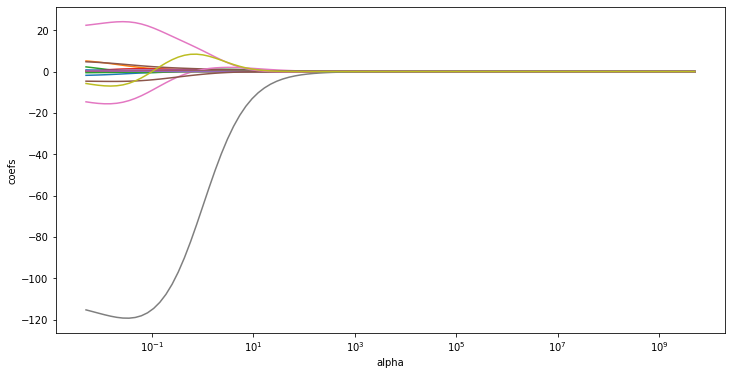

In [14]:
plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.plot(alphas, coefs)

ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefs')

In [15]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

Next we fit a ridge regression model on the training set, and evaluate its MSE on the test set, using  λ= from 3 to 15:

In [16]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data

pred2 = ridge2.predict(X_test)           # Use this model to predict the test data

# Print coefficients
print(pd.Series(ridge2.coef_,      index = X.columns)) 

# Print intercept
print(pd.Series(ridge2.intercept_, index = X.columns)) 

# Calculate the test MSE
print('MSE = ', mean_squared_error(y_test, pred2))          

AtBat           0.085324
Hits            0.406593
HmRun           1.059089
Runs            0.558199
RBI             0.442252
Walks           0.579306
Years           2.438872
CAtBat          0.006646
CHits           0.026276
CHmRun          0.163183
CRuns           0.047403
CRBI            0.054098
CWalks          0.039613
PutOuts         0.067913
Assists        -0.026562
Errors         -0.973841
League_N        2.882668
Division_W    -10.394581
NewLeague_N     5.311430
dtype: float64
AtBat          235.110996
Hits           235.110996
HmRun          235.110996
Runs           235.110996
RBI            235.110996
Walks          235.110996
Years          235.110996
CAtBat         235.110996
CHits          235.110996
CHmRun         235.110996
CRuns          235.110996
CRBI           235.110996
CWalks         235.110996
PutOuts        235.110996
Assists        235.110996
Errors         235.110996
League_N       235.110996
Division_W     235.110996
NewLeague_N    235.110996
dtype: float64
M

The test MSE when alpha = 4 is 106216. Now let's see what happens if we use a huge value 
of alpha, say  10**10 :

In [17]:
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data

# Print coefficients
print(pd.Series(ridge3.coef_,      index = X.columns)) 

# Print intercept
print(pd.Series(ridge3.intercept_, index = X.columns)) 

# Calculate the test MSE
print('MSE = ', mean_squared_error(y_test, pred3))          

AtBat          9.668604e-11
Hits           3.710200e-10
HmRun          1.398679e-09
Runs           5.755990e-10
RBI            5.601239e-10
Walks          6.488802e-10
Years          2.955466e-09
CAtBat         7.632944e-12
CHits          2.827656e-11
CHmRun         1.977853e-10
CRuns          5.350932e-11
CRBI           5.956891e-11
CWalks         5.593708e-11
PutOuts        4.491057e-11
Assists       -1.018507e-11
Errors        -2.258862e-10
League_N       8.216966e-10
Division_W    -4.998603e-09
NewLeague_N    3.827946e-09
dtype: float64
AtBat          506.746084
Hits           506.746084
HmRun          506.746084
Runs           506.746084
RBI            506.746084
Walks          506.746084
Years          506.746084
CAtBat         506.746084
CHits          506.746084
CHmRun         506.746084
CRuns          506.746084
CRBI           506.746084
CWalks         506.746084
PutOuts        506.746084
Assists        506.746084
Errors         506.746084
League_N       506.746084
Division_W 

This big penalty shrinks the coefficients to a very large degree, essentially reducing to a model containing just the intercept. 

This over-shrinking makes the model more biased, resulting in a higher MSE. (UNDERFIT)

Okay, so fitting a ridge regression model with alpha = 4 leads to a much lower test MSE than fitting a model with just an intercept. 

We now check whether there is any benefit to performing ridge regression with alpha = 4 instead of just performing least squares regression. 

Recall that least squares is simply ridge regression with alpha = 0.

In [18]:
ridge0 = Ridge(alpha = 0, normalize = True)
ridge0.fit(X_train, y_train)             
pred = ridge0.predict(X_test)        

# Print coefficients
print(pd.Series(ridge0.coef_, index = X.columns))

# Print intercept
print(pd.Series(ridge0.intercept_, index = X.columns)) 

# Calculate the test MSE
print('MSE : ', mean_squared_error(y_test, pred))           

AtBat          -2.098790
Hits           11.812454
HmRun          17.043774
Runs           -5.161804
RBI            -8.519010
Walks           4.777641
Years          -2.045433
CAtBat         -0.021455
CHits          -0.709900
CHmRun         -2.680178
CRuns           1.593576
CRBI            1.762769
CWalks         -0.835677
PutOuts         0.317750
Assists         0.433852
Errors         -9.506006
League_N       13.598503
Division_W    -47.470184
NewLeague_N   -18.483490
dtype: float64
AtBat          213.777839
Hits           213.777839
HmRun          213.777839
Runs           213.777839
RBI            213.777839
Walks          213.777839
Years          213.777839
CAtBat         213.777839
CHits          213.777839
CHmRun         213.777839
CRuns          213.777839
CRBI           213.777839
CWalks         213.777839
PutOuts        213.777839
Assists        213.777839
Errors         213.777839
League_N       213.777839
Division_W     213.777839
NewLeague_N    213.777839
dtype: float64
M

In [19]:
# It looks like we are indeed improving over regular least-squares!


Instead of arbitrarily choosing alpha  =4 , it would be better to use cross-validation to choose the tuning parameter alpha. We can do this using the cross-validated ridge regression function, RidgeCV(). 

In [20]:
ridgecv = RidgeCV(alphas = alphas, 
                  scoring = 'neg_mean_squared_error', 
                  normalize = True)

ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.008737642000038414

Therefore, we see that the value of alpha that results in the smallest 
cross-validation error is 0.57. 

What is the test MSE associated with this value of alpha?

In [21]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)

mean_squared_error(y_test, ridge4.predict(X_test))

135178.4357384306

This represents a further improvement over the test MSE that we got using alpha  =4 . 

Finally, we refit our ridge regression model on the full data set, using the value of alpha chosen by cross-validation, and examine the coefficient estimates.

In [22]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

AtBat           -1.659803
Hits             4.574831
HmRun            1.550567
Runs             0.604233
RBI              0.316147
Walks            4.437164
Years          -15.408065
CAtBat          -0.044708
CHits            0.193771
CHmRun           0.225138
CRuns            0.675158
CRBI             0.297282
CWalks          -0.496556
PutOuts          0.232418
Assists          0.301850
Errors          -4.727093
League_N        23.116572
Division_W    -116.893011
NewLeague_N     -6.627145
dtype: float64

As expected, none of the coefficients are exactly zero - 
ridge regression does not perform variable selection!

#### The Lasso

We saw that ridge regression with a wise choice of alpha can outperform least squares as well as the null model on the Hitters data set. 

We now ask whether the lasso can yield either a more accurate or a more interpretable model than ridge regression. 

In order to fit a lasso model, we'll use the Lasso() function; 
however, this time we'll need to include the argument max_iter = 10000. 

Other than that change, we proceed just as we did in fitting a ridge model:

In [12]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    #lasso.fit(scale(X_train), y_train)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

NameError: name 'X_train' is not defined

Notice that in the coefficient plot that depending on the choice of tuning parameter, some of the coefficients are exactly equal to zero. 

We now perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

In [24]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

139096.7418215593

This is substantially lower than the test set MSE of the null model and of least squares, and only a little worse than the test MSE of ridge regression with alpha chosen by cross-validation.

However, the lasso has a substantial advantage over ridge regression in that the resulting coefficient estimates are sparse. 

Here we see that 13 of the 19 coefficient estimates are exactly zero:

In [23]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

AtBat          -0.000000
Hits            2.309132
HmRun           0.000000
Runs            0.000000
RBI            -0.000000
Walks           0.000000
Years           0.000000
CAtBat          0.000000
CHits           0.077468
CHmRun          0.000000
CRuns           0.000000
CRBI            0.289898
CWalks          0.000000
PutOuts         0.244994
Assists        -0.000000
Errors         -6.122150
League_N        0.000000
Division_W    -25.109494
NewLeague_N     0.000000
dtype: float64

In [ ]:
# Why did we learn abt vector norms ?
# why did we learn abt contour plots?
# why did we learn abt eig val/vector?

# why did we learn GD ? 

# why did we learn abt matrix formula? derivative? 